# Openfoodfacts : analyse exploratoire des données

In [1]:
%matplotlib inline

import os
import zipfile
import urllib

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd
from pandas.plotting import scatter_matrix

FOOD_PATH = os.path.join("datasets", "openfoodfacts")
FOOD_TRANSFORMED_PATH_FILE = os.path.join(FOOD_PATH, "fr.openfoodfacts.org.products_transformed.csv")

import seaborn as sns
sns.set()

pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_rows",1000)



# Import des données

In [2]:
import pandas as pd

def load_food_data(csv_path=FOOD_TRANSFORMED_PATH_FILE):
    return pd.read_csv(csv_path, sep=',', header=0, encoding='utf-8', low_memory=False)



In [3]:
food = load_food_data()

In [4]:
food.head()

,code,last_modified_t,product_name,states_tags,main_category_fr,brands,brands_tags,nutrition_grade_fr,energy_100g,sugars_100g,salt_100g,saturated-fat_100g,fiber_100g,proteins_100g,ingredients_from_palm_oil_n,pnns_groups_2,pnns_groups_1,labels_tags,countries_tags,additives_tags,additives_n,ingredients_text,image_url,nutrition_scoring,no_ingredients,no_ingredients_scoring,additives_nocive_scoring,energy_100g_scoring,salt_100g_scoring,sugars_100g_scoring,saturated-fat_100g_scoring,fiber_100g_scoring,proteins_100g_scoring,bio_scoring
0,0000000003087,1474103893,Farine de blé noir,"en:to-be-completed,en:nutrition-facts-to-be-co...",NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000024600,1434535914,Filet de bœuf,"en:to-be-completed,en:nutrition-facts-to-be-co...",Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,en:france,NaN,NaN,NaN,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000027205,1458238638,NaN,"en:to-be-completed,en:nutrition-facts-to-be-co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,NaN,NaN,NaN,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000036252,1489055667,Lion Peanut x2,"en:to-be-completed,en:nutrition-facts-complete...",NaN,Sunridge,sunridge,e,1883.0,57.5,0.09652,12.5,2.5,2.5,0.0,unknown,unknown,NaN,"en:france,en:united-states",en:e322,1.0,"Milk chocolate coating (evaporated cane juice,...",http://fr.openfoodfacts.org/images/products/00...,1.0,10.0,2.0,5.0,1.0,5.0,1.0,1.0,2.0,1.0,NaN
4,0000000039259,1473538082,Twix x2,"en:to-be-completed,en:nutrition-facts-to-be-co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,en:france,NaN,NaN,NaN,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98440 entries, 0 to 98439
Data columns (total 34 columns):
code                           98440 non-null object
last_modified_t                98440 non-null int64
product_name                   91247 non-null object
states_tags                    98440 non-null object
main_category_fr               61955 non-null object
brands                         86426 non-null object
brands_tags                    86422 non-null object
nutrition_grade_fr             61415 non-null object
energy_100g                    64593 non-null float64
sugars_100g                    62515 non-null float64
salt_100g                      62574 non-null float64
saturated-fat_100g             62375 non-null float64
fiber_100g                     45723 non-null float64
proteins_100g                  64318 non-null float64
ingredients_from_palm_oil_n    53466 non-null float64
pnns_groups_2                  67038 non-null object
pnns_groups_1                  64881 

In [86]:
scoring_features = ['nutrition_scoring', 'no_ingredients_scoring',
       'additives_nocive_scoring', 'energy_100g_scoring', 'salt_100g_scoring',
       'sugars_100g_scoring', 'saturated-fat_100g_scoring',
       'fiber_100g_scoring', 'proteins_100g_scoring', 'bio_scoring']

quantity_features = ['energy_100g', 'sugars_100g', 'salt_100g', 'saturated-fat_100g', 'fiber_100g', 'proteins_100g' ]

In [126]:
food.groupby('main_category_fr')[['main_category_fr']].count()['main_category_fr'].quantile(0.75)

1.0

In [134]:
food['main_category_fr'].value_counts()[:100]

Boissons                                   4435
Conserves                                  2074
Epicerie                                   2069
Chocolats                                  1971
Plats préparés                             1758
Biscuits                                   1738
Aliments et boissons à base de végétaux    1535
Surgelés                                   1471
Petit-déjeuners                            1434
Desserts                                   1413
Snacks sucrés                              1349
Plats à base de viande                     1307
Pains                                      1260
Pâtes alimentaires                         1240
Gâteaux                                    1098
Produits à tartiner salés                  1065
Fromages                                    952
Chips et frites                             913
Bonbons                                     888
Soupes                                      821
Confitures                              

# Anayse univariée des features de scoring

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B9D877D8C8>,
      dtype=object)

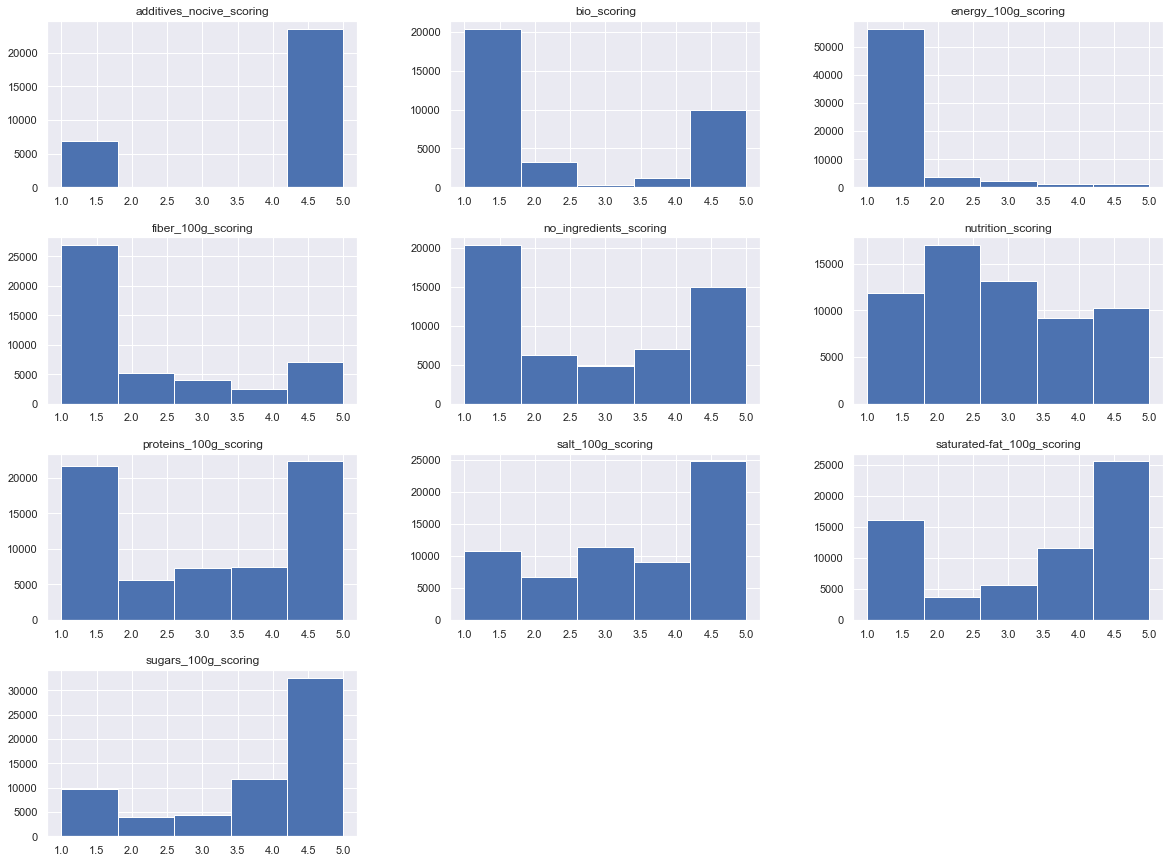

In [91]:
food[scoring_features].hist(bins=5, figsize=(20,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B9CD746A48>,
      dtype=object)

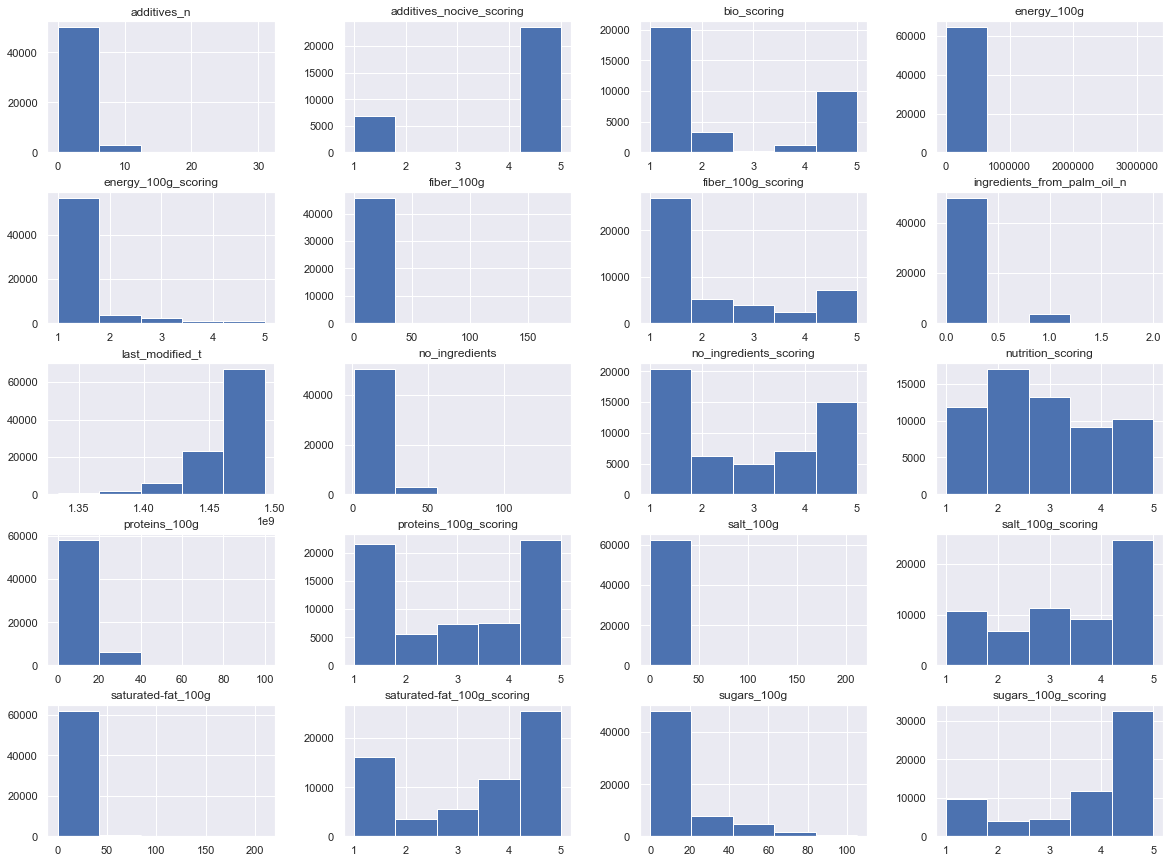

In [5]:
food.hist(bins=5, figsize=(20,15))

In [6]:
corr_matrix = food.corr()

In [7]:
corr_matrix['bio_scoring'].sort_values(ascending=False)

bio_scoring                    1.000000
salt_100g_scoring              0.207577
last_modified_t                0.203922
fiber_100g_scoring             0.170695
no_ingredients_scoring         0.165324
fiber_100g                     0.155727
nutrition_scoring              0.123408
additives_nocive_scoring       0.112090
saturated-fat_100g_scoring     0.079399
sugars_100g                    0.049733
energy_100g_scoring            0.003027
energy_100g                   -0.001230
saturated-fat_100g            -0.015898
proteins_100g_scoring         -0.026112
salt_100g                     -0.032090
proteins_100g                 -0.048194
ingredients_from_palm_oil_n   -0.050417
sugars_100g_scoring           -0.054466
no_ingredients                -0.169580
additives_n                   -0.255425
Name: bio_scoring, dtype: float64

In [8]:
food.columns

Index(['code', 'last_modified_t', 'product_name', 'states_tags',
       'main_category_fr', 'brands', 'brands_tags', 'nutrition_grade_fr',
       'energy_100g', 'sugars_100g', 'salt_100g', 'saturated-fat_100g',
       'fiber_100g', 'proteins_100g', 'ingredients_from_palm_oil_n',
       'pnns_groups_2', 'pnns_groups_1', 'labels_tags', 'countries_tags',
       'additives_tags', 'additives_n', 'ingredients_text', 'image_url',
       'nutrition_scoring', 'no_ingredients', 'no_ingredients_scoring',
       'additives_nocive_scoring', 'energy_100g_scoring', 'salt_100g_scoring',
       'sugars_100g_scoring', 'saturated-fat_100g_scoring',
       'fiber_100g_scoring', 'proteins_100g_scoring', 'bio_scoring'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B9D27FE708>,
      dtype=object)

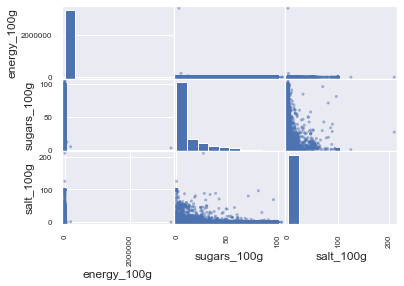

In [9]:
attributes_to_analyze = ['energy_100g', 'sugars_100g', 'salt_100g']

#attributes_to_analyze = ['energy_100g', 'sugars_100g', 'salt_100g', 'saturated-fat_100g',
#       'fiber_100g', 'proteins_100g']
scatter_matrix(food[attributes_to_analyze])

# Réduction dimensionnelle

In [10]:
food.columns


[      'energy_100g', 'sugars_100g', 'salt_100g', 'saturated-fat_100g',
       'fiber_100g', 'proteins_100g', 'ingredients_from_palm_oil_n',
       'pnns_groups_2', 'pnns_groups_1', 'labels_tags', 'countries_tags',
       'additives_tags', 'additives_n', 'ingredients_text', 'image_url',
       'nutrition_scoring', 'no_ingredients', 'no_ingredients_scoring',
       'additives_nocive_scoring', 'energy_100g_scoring', 'salt_100g_scoring',
       'sugars_100g_scoring', 'saturated-fat_100g_scoring',
       'fiber_100g_scoring', 'proteins_100g_scoring', 'bio_scoring']


[      'nutrition_scoring', 'no_ingredients_scoring',
       'additives_nocive_scoring', 'energy_100g_scoring', 'salt_100g_scoring',
       'sugars_100g_scoring', 'saturated-fat_100g_scoring',
       'fiber_100g_scoring', 'proteins_100g_scoring', 'bio_scoring']

['nutrition_scoring',
 'no_ingredients_scoring',
 'additives_nocive_scoring',
 'energy_100g_scoring',
 'salt_100g_scoring',
 'sugars_100g_scoring',
 'saturated-fat_100g_scoring',
 'fiber_100g_scoring',
 'proteins_100g_scoring',
 'bio_scoring']

In [27]:
# Import `PCA` from `sklearn.decomposition`
from sklearn.decomposition import PCA

# Build the model
pca = PCA(n_components=2)

data_pca = data_pca.dropna()

X = data_pca.values
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Reduce the data, output is ndarray
reduced_data = pca.fit_transform(X_scaled)

# Inspect shape of the `reduced_data`
print(reduced_data.shape)

# print out the reduced data
print(reduced_data)

(8157, 2)
[[-4.54511176e-01 -8.94009376e-01]
 [-6.41881364e-01 -1.24684494e+00]
 [-2.16944416e+00 -1.41269560e+00]
 ...
 [-1.13791225e+00 -3.94747167e-01]
 [ 1.84579928e+00 -1.18447787e-03]
 [ 1.98343880e+00  2.93841392e-01]]


In [26]:
# Comment ne garder que les valeurs not null ?
food[food[['nutrition_scoring', 'no_ingredients_scoring']].notnull() == True]

,code,last_modified_t,product_name,states_tags,main_category_fr,brands,brands_tags,nutrition_grade_fr,energy_100g,sugars_100g,salt_100g,saturated-fat_100g,fiber_100g,proteins_100g,ingredients_from_palm_oil_n,pnns_groups_2,pnns_groups_1,labels_tags,countries_tags,additives_tags,additives_n,ingredients_text,image_url,nutrition_scoring,no_ingredients,no_ingredients_scoring,additives_nocive_scoring,energy_100g_scoring,salt_100g_scoring,sugars_100g_scoring,saturated-fat_100g_scoring,fiber_100g_scoring,proteins_100g_scoring,bio_scoring
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
type(reduced_data)

numpy.ndarray

In [41]:
data_pca[['nutrition_scoring']].values

array([[2.],
       [2.],
       [1.],
       ...,
       [3.],
       [3.],
       [4.]])

In [44]:
data.columns

Index(['code', 'last_modified_t', 'product_name', 'states_tags',
       'main_category_fr', 'brands', 'brands_tags', 'nutrition_grade_fr',
       'energy_100g', 'sugars_100g', 'salt_100g', 'saturated-fat_100g',
       'fiber_100g', 'proteins_100g', 'ingredients_from_palm_oil_n',
       'pnns_groups_2', 'pnns_groups_1', 'labels_tags', 'countries_tags',
       'additives_tags', 'additives_n', 'ingredients_text', 'image_url',
       'nutrition_scoring', 'no_ingredients', 'no_ingredients_scoring',
       'additives_nocive_scoring', 'energy_100g_scoring', 'salt_100g_scoring',
       'sugars_100g_scoring', 'saturated-fat_100g_scoring',
       'fiber_100g_scoring', 'proteins_100g_scoring', 'bio_scoring'],
      dtype='object')

In [46]:
type(data_pca[['nutrition_scoring']].values)

numpy.ndarray

In [70]:
data_pca[['nutrition_scoring']].values.shape

(8157, 1)

In [55]:
data_pca[['nutrition_scoring']].values[:,0].shape

(8157,)

In [52]:
data_pca['nutrition_scoring'].value_counts()

2.0    1998
3.0    1902
5.0    1455
4.0    1412
1.0    1390
Name: nutrition_scoring, dtype: int64

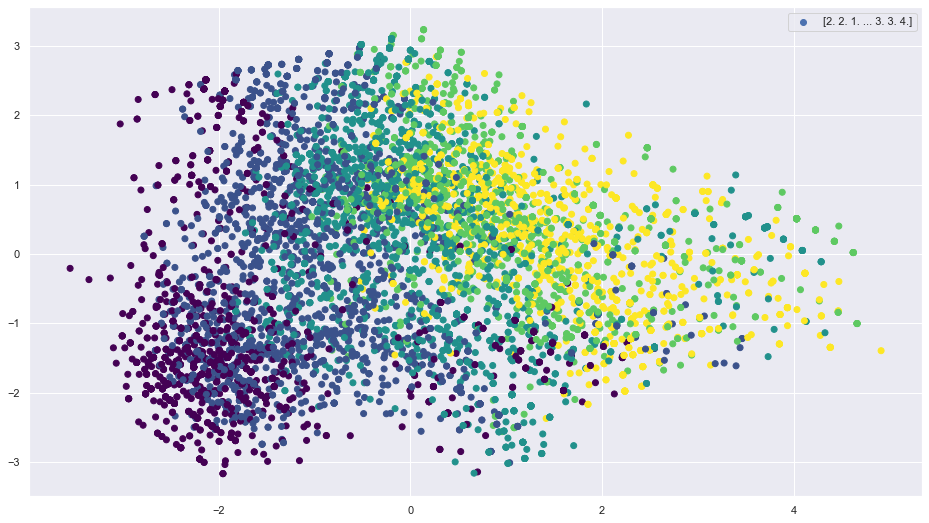

In [60]:

plt.scatter(reduced_data[:,0], reduced_data[:,1], c = data_pca[['nutrition_scoring']].values[:,0], label=data_pca[['nutrition_scoring']].values[:,0], cmap = 'viridis')
plt.legend()

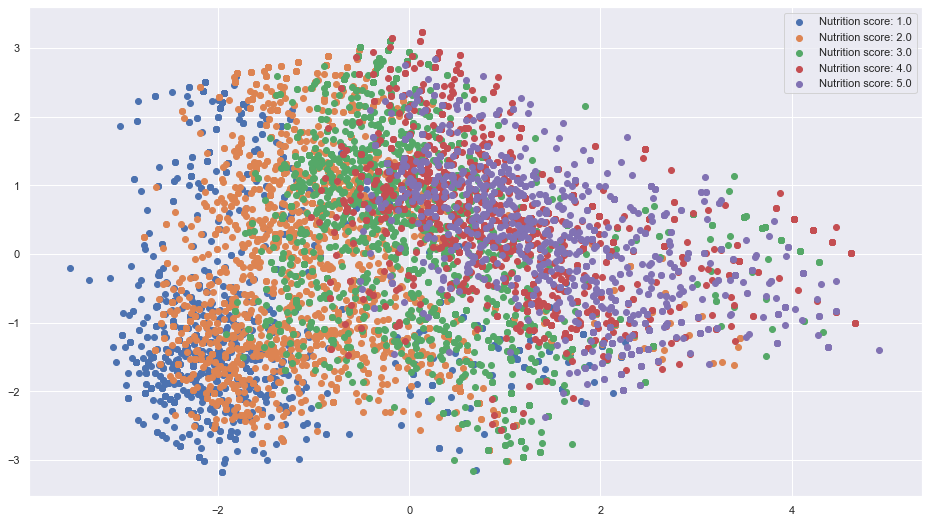

In [82]:

for data_group_value in np.unique(data_pca[['nutrition_scoring']].values[:,0]):
    data_group_instances = np.where(data_pca[['nutrition_scoring']].values[:,0] == data_group_value)
    plt.scatter(reduced_data[:,0][data_group_instances], reduced_data[:,1][data_group_instances], label='Nutrition score: '+str(data_group_value))
    
plt.legend()
plt.show()

In [ ]:

key = {0: ('red', 'E'), 1: ('green', 'D')}
plt.scatter(X, Y, c=[key[index][0] for index in labels])
patches = [mpatches.Patch(color=color, label=label) for color, label in key.values()]
plt.legend(handles=patches, labels=[label for _, label in key.values()], bbox_to_anchor=(1, .3))
plt.show()

In [32]:
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=X_scaled[X_scaled['nutrition_scoring'].notnull()]['nutrition_scoring'], cmap = 'viridis')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

ValueError: 'c' argument has 98440 elements, which is not acceptable for use with 'x' with size 8157, 'y' with size 8157.

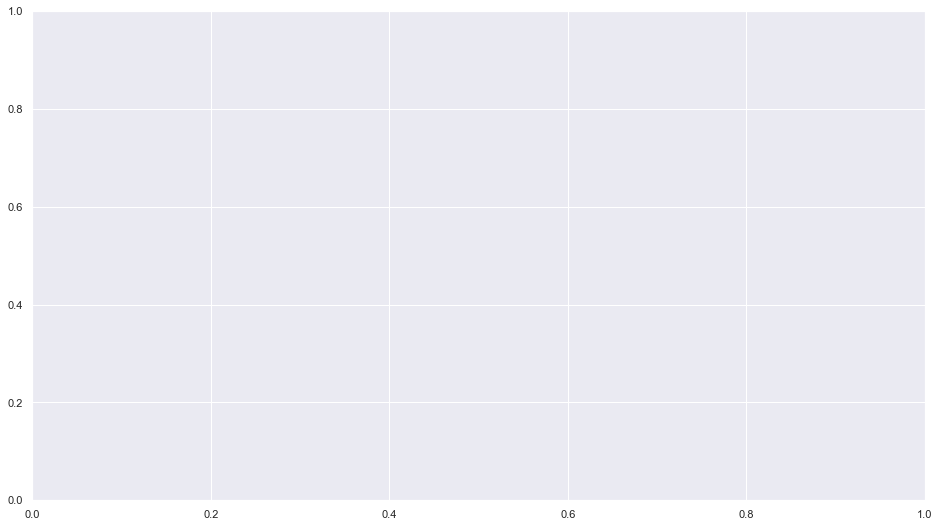

In [28]:
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=food['nutrition_scoring'].notnull(), cmap = 'viridis')

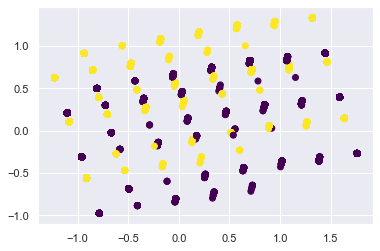

In [13]:
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=food['bio_scoring'].notnull(), cmap = 'viridis')

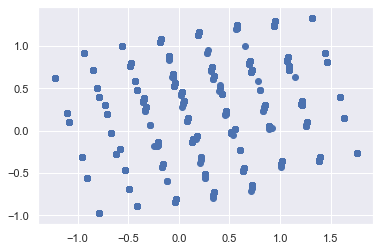

In [14]:
plt.scatter(reduced_data[:,0], reduced_data[:,1], cmap = 'viridis')

In [15]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(16,16))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
plt.show()

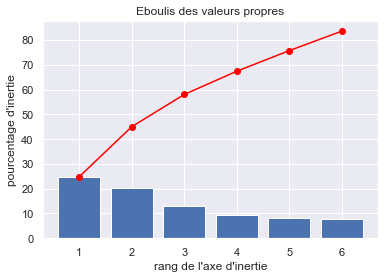

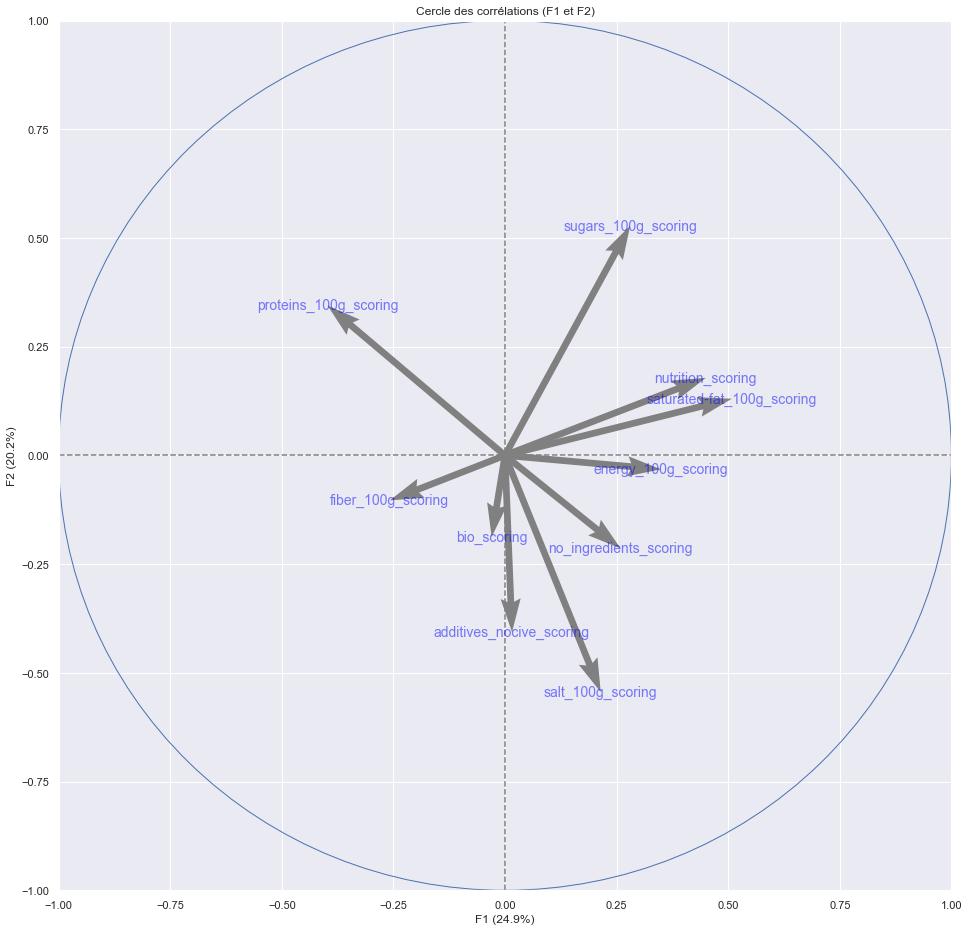

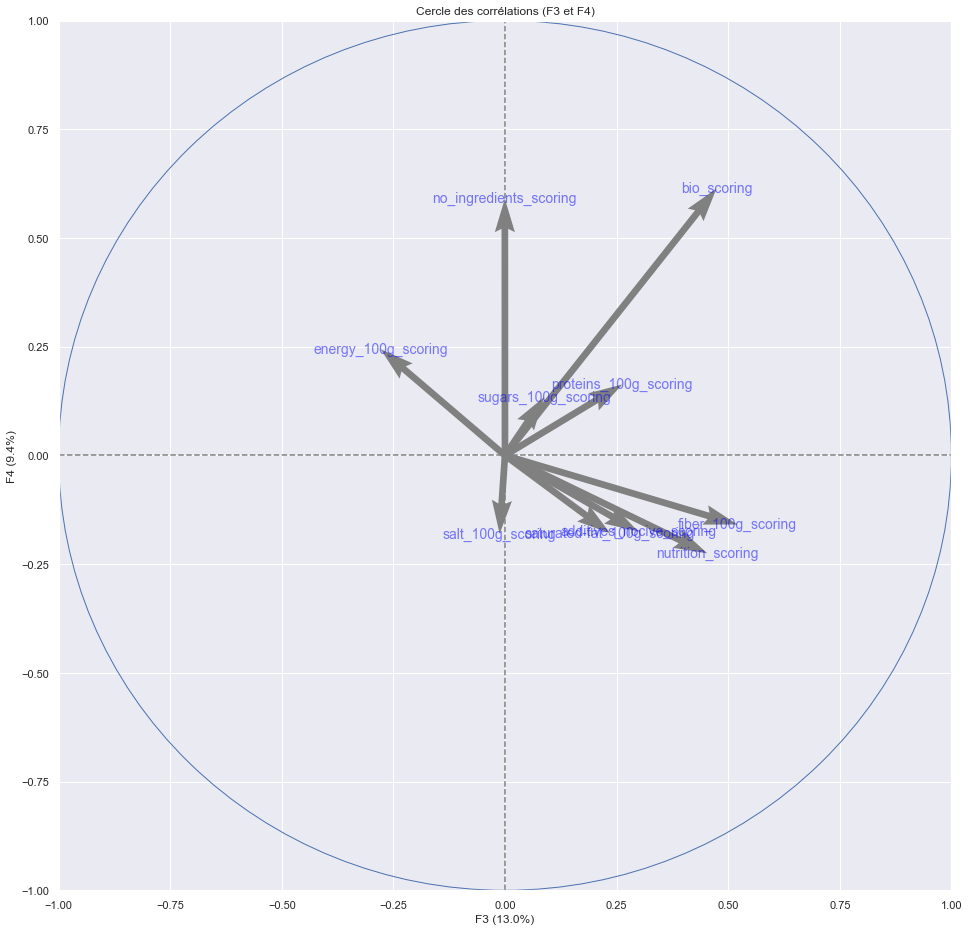

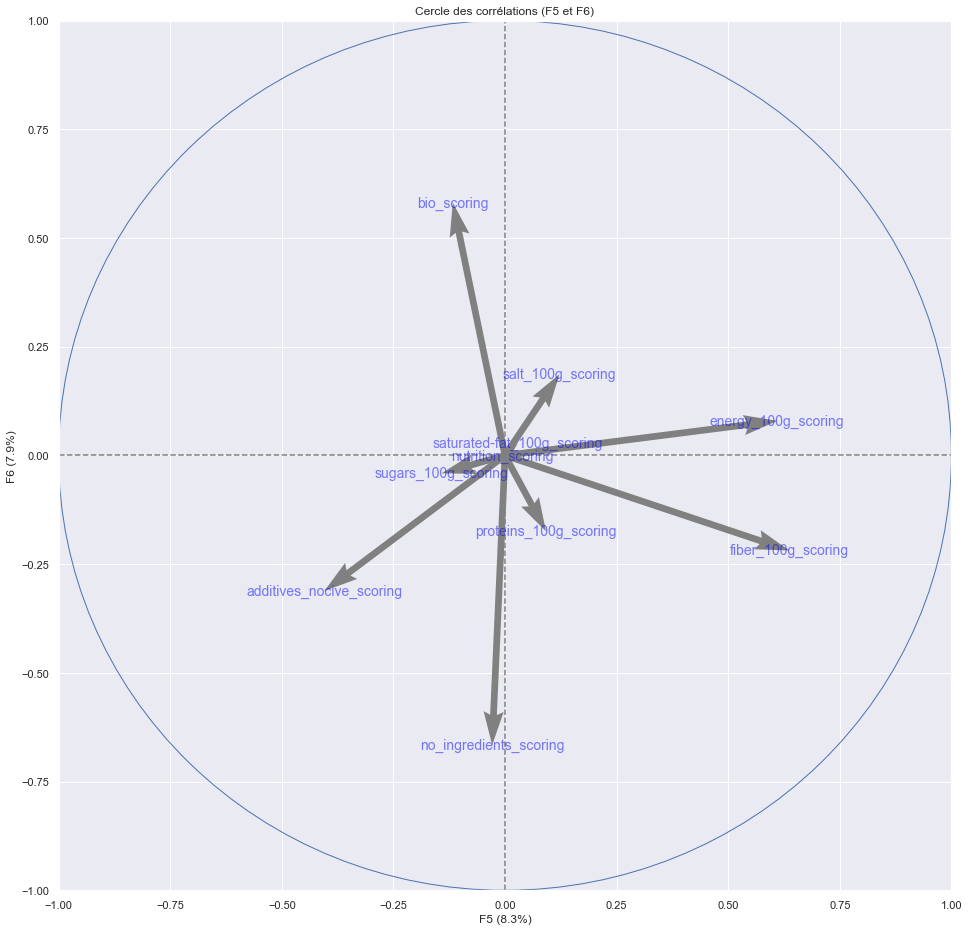

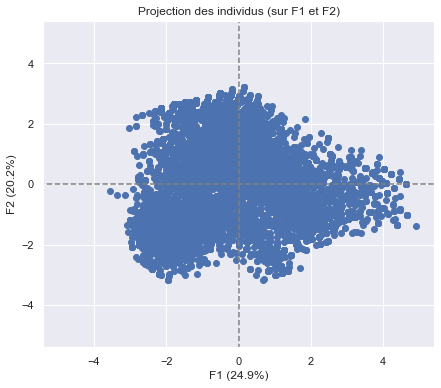

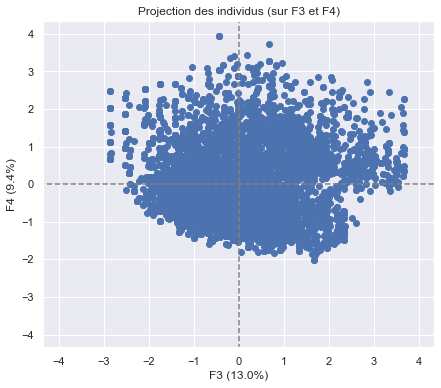

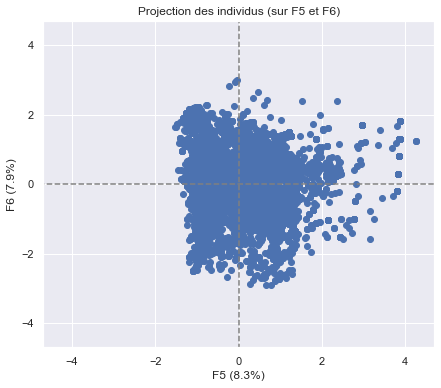

In [16]:

from sklearn import decomposition
from sklearn import preprocessing

# choix du nombre de composantes à calculer
n_comp = 6

# import de l'échantillon
data = food

# selection des colonnes à prendre en compte dans l'ACP
data_pca = food[['nutrition_scoring', 'no_ingredients_scoring',
       'additives_nocive_scoring', 'energy_100g_scoring', 'salt_100g_scoring',
       'sugars_100g_scoring', 'saturated-fat_100g_scoring',
       'fiber_100g_scoring', 'proteins_100g_scoring', 'bio_scoring']]

# préparation des données pour l'ACP
#data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
data_pca = data_pca.dropna()

X = data_pca.values
#names = data["idCours"] # ou data.index pour avoir les intitulés

#features = data.columns
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
#plt.figure(figsize=(16,10))
plt.rcParams["figure.figsize"] = [16,9]
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))


'''
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))
'''


# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)])


plt.show()



Représenter le lien entre le scoring bio et le nombre d'ingrédients